In [12]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime as dt
import pickle
import math
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [13]:
df=pd.read_csv('../dataset/updated_train1.csv')

In [14]:
df1=df.dropna()
df1.set_index('store_id_date',drop=True,inplace=True)

In [15]:
print(df1.shape)
df1.head()

(252108, 27)


,visitors,dow,year,month,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,...,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover
store_id_date,,,,,,,,,,,,,,,,,,,,,
air_ba937bf13d40fb24_2016-01-13,25,2,2016,1,7.0,23.843750,25.0,57.0,64.0,4.0,...,8.7,10.86,0.0,0.0,1.7,4.9,1010.1,60.0,1013.1,2.5
air_ba937bf13d40fb24_2016-01-14,32,3,2016,1,2.0,20.292308,21.0,54.0,65.0,4.0,...,9.1,12.09,0.0,0.0,2.0,4.6,1008.9,52.0,1011.9,0.5
air_ba937bf13d40fb24_2016-01-15,29,4,2016,1,4.0,34.738462,35.0,61.0,65.0,4.0,...,8.1,11.67,0.0,0.0,2.5,5.7,1013.1,64.0,1016.1,6.0
air_ba937bf13d40fb24_2016-01-16,22,5,2016,1,6.0,27.651515,27.0,53.0,66.0,4.0,...,9.1,12.41,0.0,0.0,1.9,5.1,1015.8,54.0,1018.8,2.3
air_ba937bf13d40fb24_2016-01-18,6,0,2016,1,2.0,13.754386,12.0,34.0,57.0,4.0,...,1.4,2.40,6.0,6.0,3.7,7.1,995.9,95.0,998.9,7.5


In [19]:
X = df1.drop('visitors', axis=1).as_matrix()
y = df1['visitors']

#データをわける
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)

/Users/toshio/.pyenv/versions/anaconda3-4.3.0/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [21]:
# Grid Search
#parameterの設定
params={'n_estimators':[300], 
                'max_depth':[5],
                'criterion':['mse'],
                'random_state':[1],
                'n_jobs':[-1]
}

#モデルの設定
rf_model=RandomForestRegressor()

#指標の設定
rmslescoring=make_scorer(rmsle)

#gridsearch
gs = GridSearchCV(rf_model,params,scoring=rmslescoring)
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse'], 'n_estimators': [300], 'random_state': [1], 'n_jobs': [-1], 'max_depth': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(rmsle), verbose=0)

In [22]:
y_test_pred = gs.predict(X_test)
y_train_pred =gs.predict(X_train)
gs.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'n_estimators': 300,
 'n_jobs': -1,
 'random_state': 1}

In [24]:
from sklearn.metrics import mean_squared_error
print(rmsle(y_test,y_test_pred))
print(rmsle(y_train,y_train_pred))

0.5494877508309192
0.5434347069641536


In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.561980589812
0.563629956063


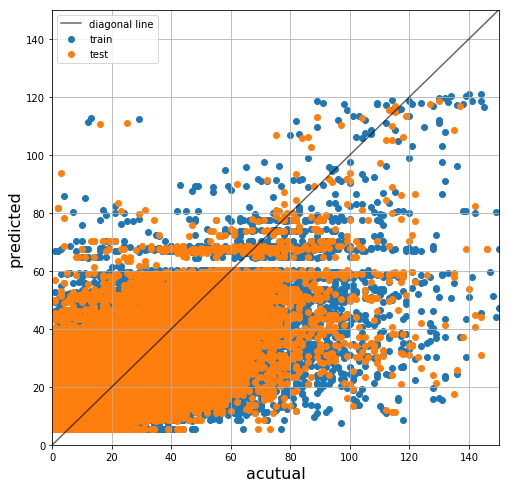

In [26]:
u_lim=150
l_lim=0
plt.figure(figsize=(8, 8))
plt.plot([l_lim,u_lim], [l_lim,u_lim], c='k', alpha=0.6, label = 'diagonal line') # diagonal line
plt.scatter(y_train,y_train_pred,label='train')
plt.scatter(y_test,y_test_pred,label='test')
plt.xlim(l_lim,u_lim)
plt.ylim(l_lim,u_lim)
plt.xlabel('acutual', fontsize=16)
plt.ylabel('predicted', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [27]:
with open('rf.pickle', mode='wb') as f:
    pickle.dump(gs, f)

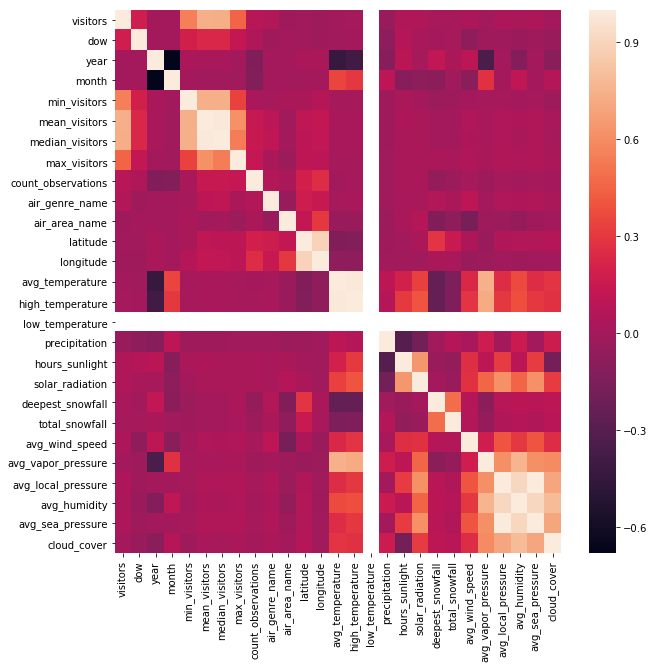

In [28]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())
plt.show()